In [27]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data, color, io
import IPython

import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread
from skimage.transform import resize

In [28]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

## Load an RGB image of your choice from a URL

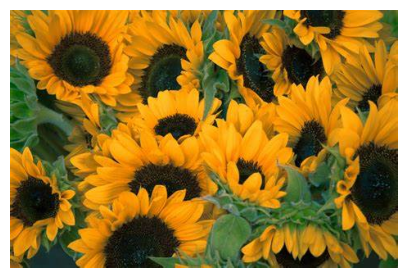

In [29]:
image = io.imread("https://th.bing.com/th/id/OIP.himN5x0Zvru00xUdk3p55QHaE8?pid=ImgDet&rs=1")

image = image[:,:,:]

plot(image)

In [30]:
image.shape

(316, 474, 3)

Resize the image to 224x224

In [31]:
image_resize = resize(image, (224,224))

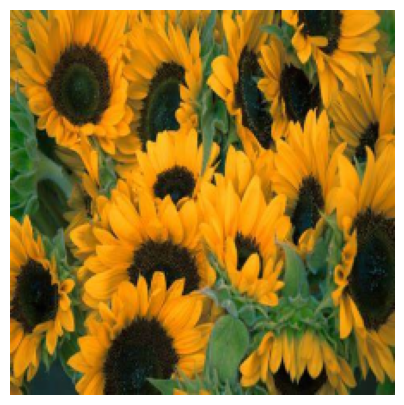

In [32]:
plot(image_resize)

In [45]:
image_resize.shape

(224, 224, 3)

## Show a grayscale copy

In [50]:
image_gray = np.mean(image_resize, axis=2)

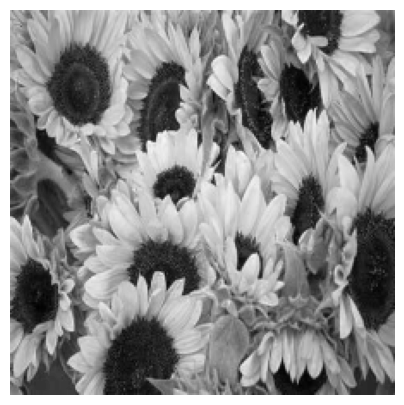

In [51]:
plot(image_gray)

## Convolve with 10 random filters and show filters and features maps for each

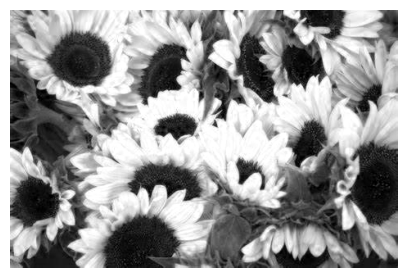

In [52]:
image = io.imread("https://th.bing.com/th/id/OIP.himN5x0Zvru00xUdk3p55QHaE8?pid=ImgDet&rs=1")
image = image[:,:,0]
image = image.astype(float)
image /= 255.0
plot(image)

In [54]:
a = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])

In [55]:
f=a

In [56]:
x=image

In [57]:
f

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [58]:
f[2,2]

-1

In [59]:
x2 = np.zeros(x.shape)

In [60]:
for i in range(1,x.shape[0]-1):
    for j in range(1,x.shape[1]-1):

        x2[i,j] = f[0,0] * x[i-1,j-1]  \
        +         f[0,1] * x[i-1,j]    \
        +         f[0,2] * x[i-1,j+1]  \
        +         f[1,0] * x[i,j-1]    \
        +         f[1,1] * x[i,j]      \
        +         f[1,2] * x[i,j+1]    \
        +         f[2,0] * x[i+1,j-1]  \
        +         f[2,1] * x[i+1,j]    \
        +         f[2,2] * x[i+1,j+1]

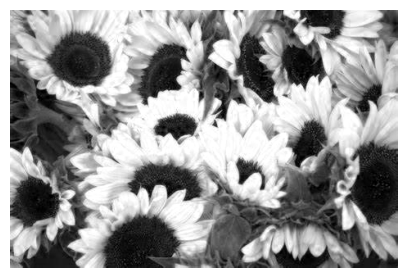

In [61]:
plot(x)

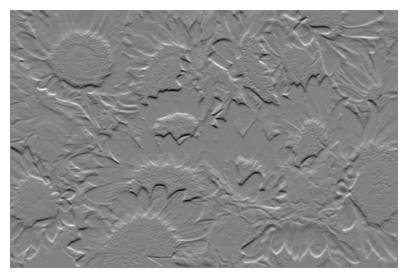

In [62]:
plot(x2)

In [63]:
def conv2(x,f):
    x2 = np.zeros(x.shape)
    for i in range(1,x.shape[0]-1):
        for j in range(1,x.shape[1]-1):

            x2[i,j] = f[0,0] * x[i-1,j-1] \
            +         f[0,1] * x[i-1,j] \
            +         f[0,2] * x[i-1,j+1] \
            +         f[1,0] * x[i,j-1] \
            +         f[1,1] * x[i,j] \
            +         f[1,2] * x[i,j+1] \
            +         f[2,0] * x[i+1,j-1] \
            +         f[2,1] * x[i+1,j] \
            +         f[2,2] * x[i+1,j+1]

    return x2

In [64]:
a=np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# a=np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])
# a=np.matrix([[1,1,1],[1,1,1],[1,1,1]])
# a=5*np.random.random((3,3))-5*np.random.random((3,3))

In [65]:
a

matrix([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]])

In [66]:
z = conv2(x,a)

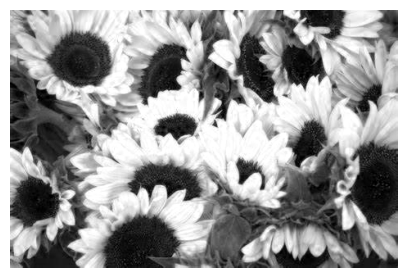

In [67]:
plot(x)

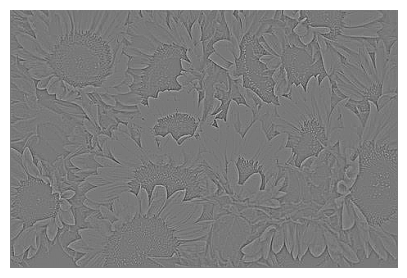

In [68]:
plot(z)

In [69]:
x

array([[0.78039216, 0.64313725, 0.54509804, ..., 0.37647059, 0.45882353,
        0.45882353],
       [0.7254902 , 0.72156863, 0.65490196, ..., 0.36862745, 0.44313725,
        0.44313725],
       [0.6745098 , 0.7372549 , 0.72156863, ..., 0.34901961, 0.42352941,
        0.42745098],
       ...,
       [0.61568627, 0.58039216, 0.54901961, ..., 0.09411765, 0.07058824,
        0.12156863],
       [0.65098039, 0.61568627, 0.58431373, ..., 0.10980392, 0.16078431,
        0.21960784],
       [0.6745098 , 0.63921569, 0.6       , ..., 0.11764706, 0.15294118,
        0.22352941]])

In [70]:
np.random.random((3,3))

array([[0.05569486, 0.0855523 , 0.67961674],
       [0.05593057, 0.8514206 , 0.00395348],
       [0.04061775, 0.13975122, 0.84006325]])

In [71]:
a = 2*np.random.random((3,3))-1

In [72]:
a

array([[ 0.55755105, -0.39900531, -0.30856652],
       [-0.72815421,  0.72879599,  0.96284778],
       [ 0.643924  , -0.63798611, -0.61868965]])

In [73]:
a = np.random.random((3,3))

In [74]:
a

array([[0.14800762, 0.00198977, 0.06314852],
       [0.38769879, 0.03540222, 0.28828867],
       [0.29038581, 0.82804513, 0.44326405]])

[[-0.7997132   0.09655747  0.75626518]
 [-0.28633061 -0.40953952 -0.99523067]
 [-0.09727523 -0.74406104  0.1559018 ]]


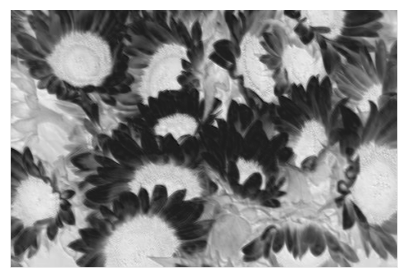

[[-0.70192561  0.40507224  0.57211107]
 [-0.2512832   0.21171606  0.7931658 ]
 [ 0.44179898 -0.2507594   0.02899179]]


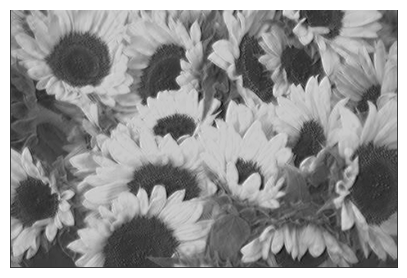

[[ 0.19089605 -0.75237271  0.17416443]
 [ 0.02897997  0.38910166 -0.467093  ]
 [-0.66764806 -0.99659514  0.8039468 ]]


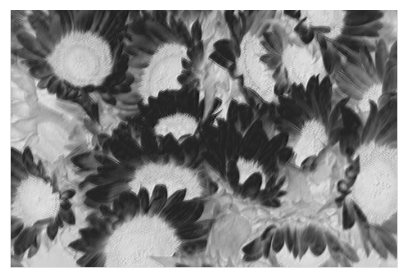

[[ 0.48958606  0.07252743 -0.25491428]
 [ 0.14539602 -0.5913719  -0.89385245]
 [-0.14248898  0.22787133  0.2298711 ]]


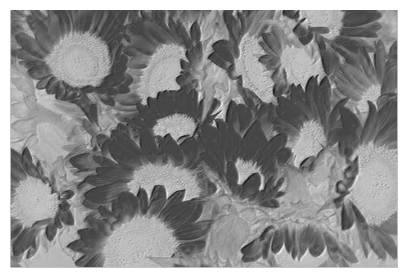

[[-0.99894721 -0.12713984  0.18775339]
 [ 0.04622794  0.26452072 -0.99129421]
 [ 0.8467587   0.44779583  0.85259989]]


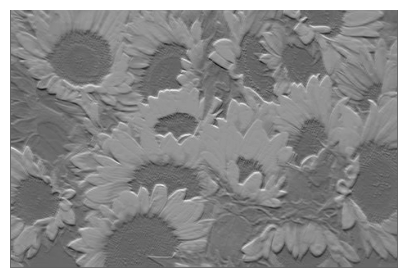

[[ 0.82035061  0.98576882  0.71874112]
 [ 0.43165962  0.74061     0.91793897]
 [ 0.22260251 -0.26647092  0.95663088]]


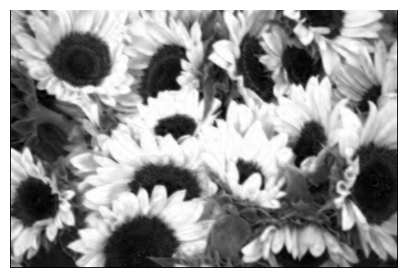

[[ 0.60815112 -0.39971487  0.53216306]
 [-0.94675527 -0.78952186  0.72219243]
 [-0.04640403  0.79865533 -0.13957937]]


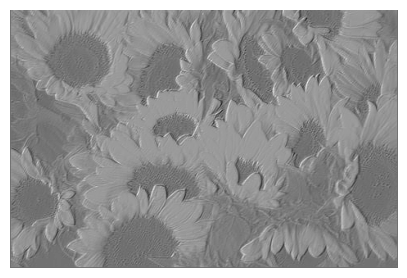

[[-0.04828858 -0.99976925  0.01820573]
 [-0.27828944  0.25949808 -0.77844774]
 [-0.68462797 -0.86697622 -0.85990469]]


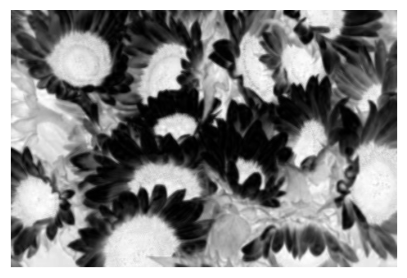

[[ 0.30646707  0.09752915 -0.41224266]
 [ 0.06657831 -0.60858405 -0.17423731]
 [-0.13928942  0.89450942  0.37293422]]


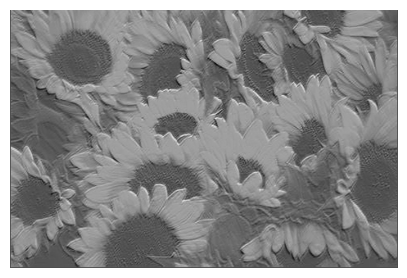

[[ 0.94601739 -0.96325451  0.12791479]
 [-0.4532898   0.67744702  0.37752479]
 [-0.699955    0.26500296  0.19034114]]


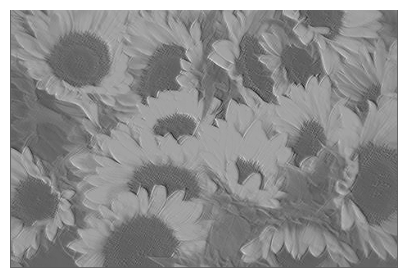

In [78]:
for i in range(10):
    a = 2*np.random.random((3,3))-1
    print(a)
    z=conv2(x,a)
    plot(z)

In [82]:
img_url = "https://th.bing.com/th/id/OIP.himN5x0Zvru00xUdk3p55QHaE8?pid=ImgDet&rs=1"
img = io.imread(img_url)
x = color.rgb2gray(img)

In [83]:
def plot(matrix):
    plt.imshow(matrix, cmap='gray')
    plt.colorbar()
    plt.show()

[[-0.41411769 -0.09411231  0.94634684]
 [-0.35816383 -0.29200362  0.08043343]
 [-0.15015224  0.31055827 -0.41293216]]


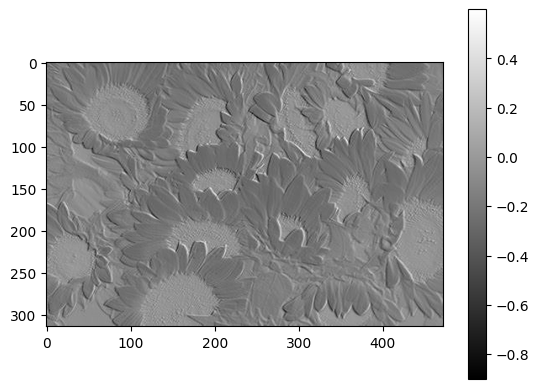

[[ 0.92221918 -0.06325874  0.80319775]
 [-0.85313518  0.76790659 -0.69668889]
 [ 0.5918219  -0.95285798 -0.9050593 ]]


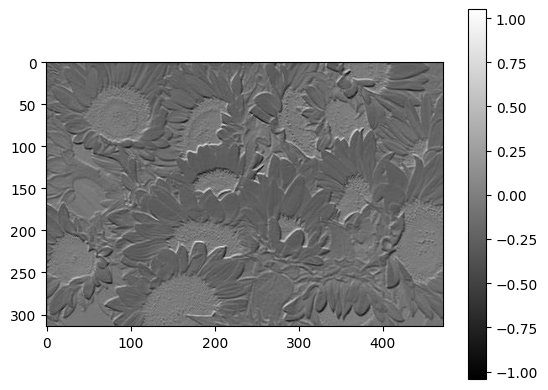

[[-0.94525014 -0.67077901  0.89827158]
 [-0.82185305 -0.73640714  0.18233811]
 [-0.0591441  -0.29188748  0.58866318]]


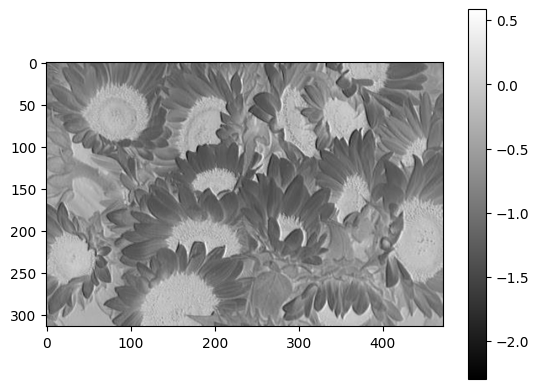

[[ 0.70308465  0.94787276  0.42062692]
 [ 0.41714614 -0.05807855 -0.59252894]
 [-0.19983706  0.08343734  0.43895995]]


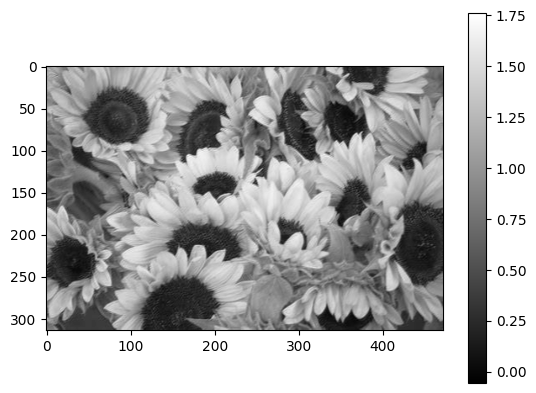

[[-0.67726535 -0.6647112  -0.10758414]
 [ 0.47071362  0.82093108 -0.93795022]
 [-0.52515257 -0.20646879  0.32236307]]


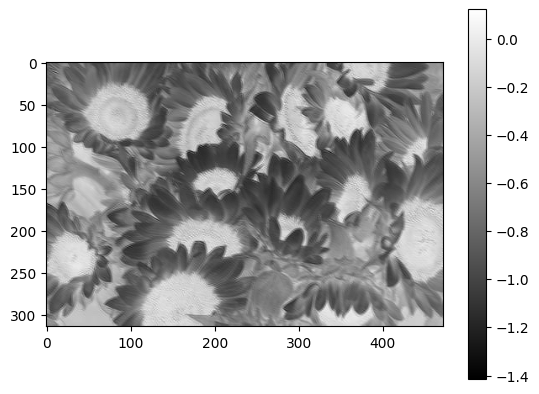

[[ 0.83350928  0.64977201  0.20049645]
 [ 0.2747205  -0.07668986  0.21505731]
 [-0.92669497  0.25830093  0.40109075]]


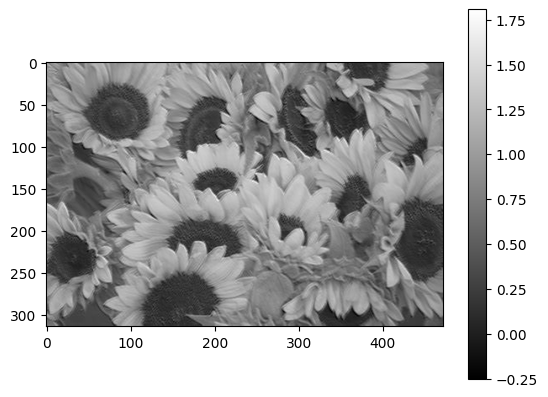

[[ 0.56383616  0.14139431  0.61604872]
 [-0.93897415 -0.82520854 -0.72795474]
 [ 0.58279139  0.47088351 -0.62745096]]


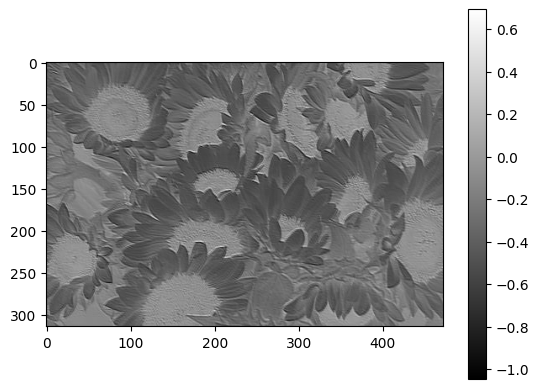

[[-0.93729156  0.86302878 -0.93920687]
 [-0.2417444   0.17872012 -0.49868673]
 [ 0.68137239  0.76027538 -0.51175735]]


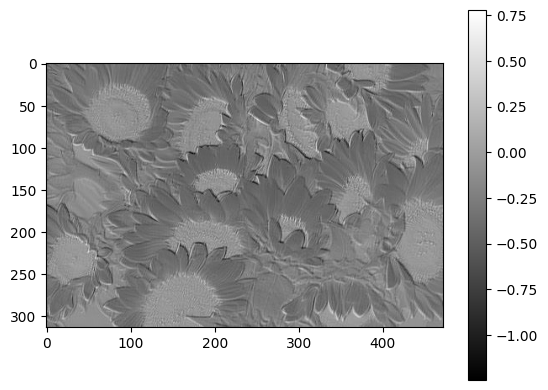

[[ 0.51935064 -0.57842462 -0.00337045]
 [ 0.72555773 -0.73806883  0.02521174]
 [-0.09018107 -0.0926522  -0.26544281]]


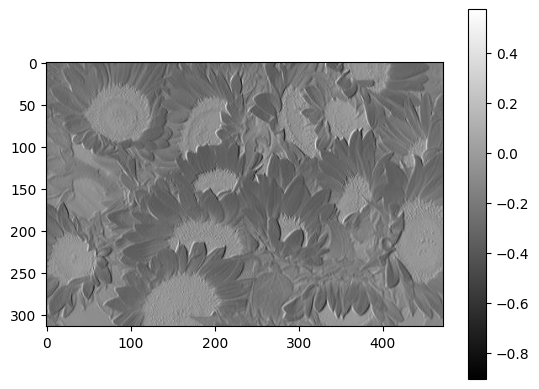

[[ 0.5383957  -0.26098702  0.4365574 ]
 [ 0.46831357 -0.81841752 -0.99154733]
 [-0.1061753   0.93406385 -0.26208488]]


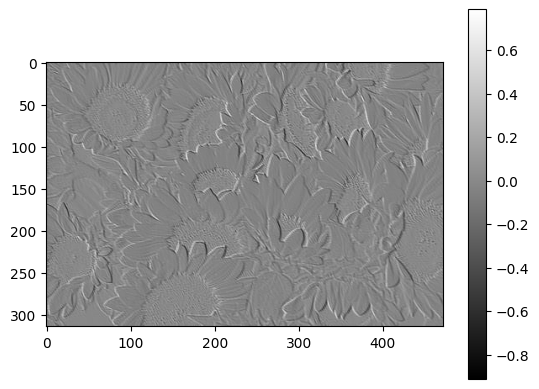

In [84]:
for i in range(10):
    a = 2 * np.random.random((3, 3)) - 1
    print(a)
    z = convolve2d(x, a, mode='valid')  # 2D convolution
    plot(z)